    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

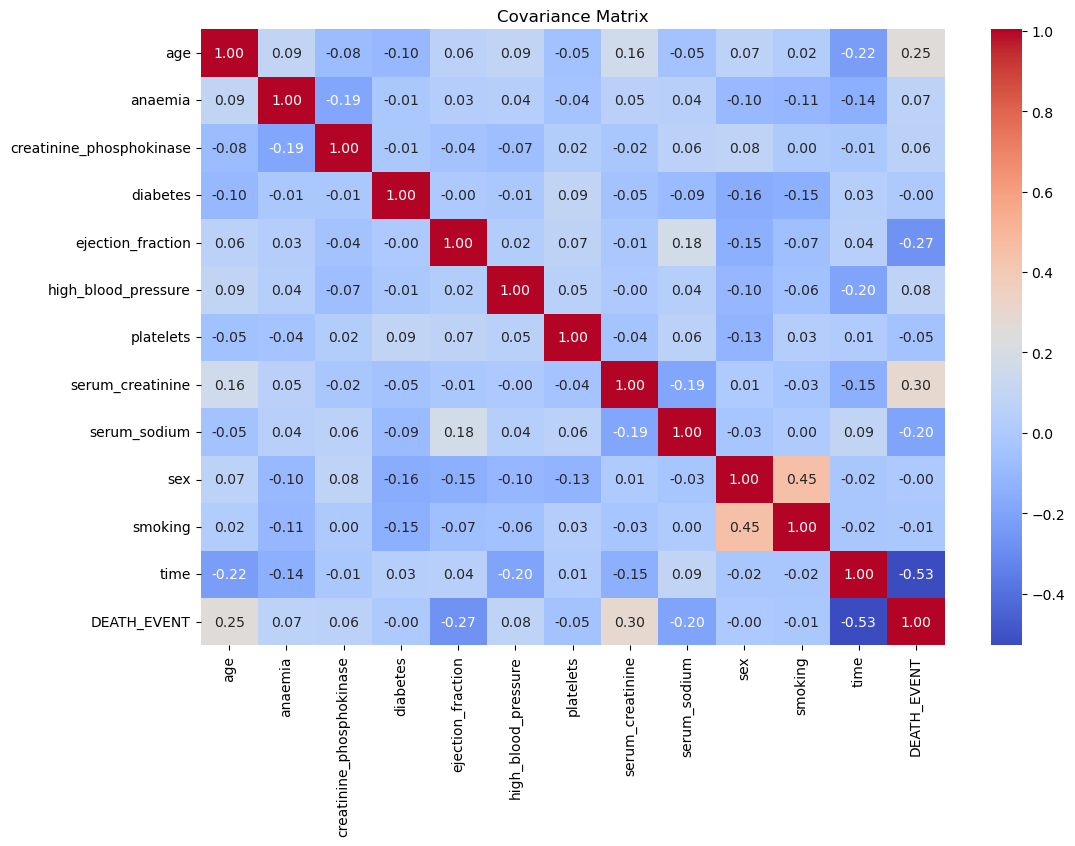

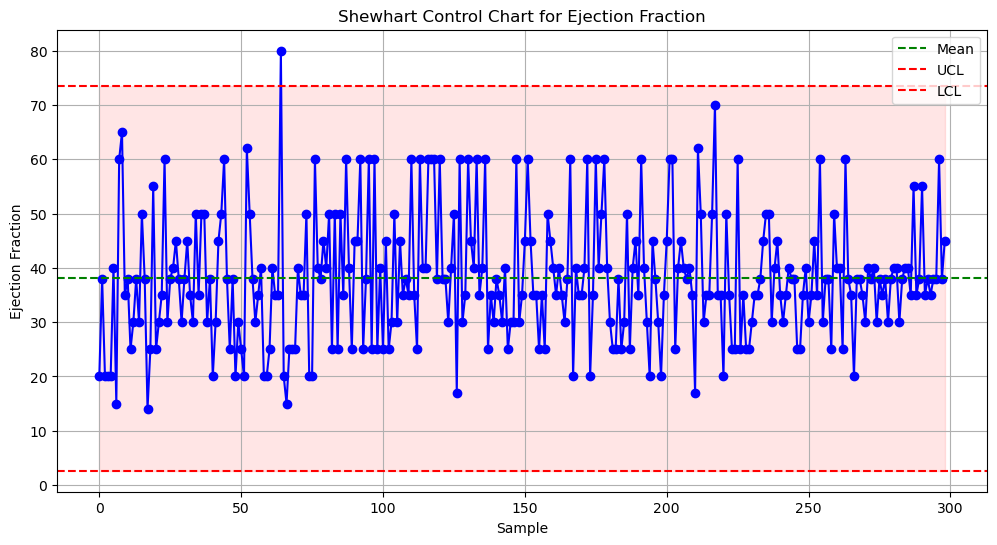

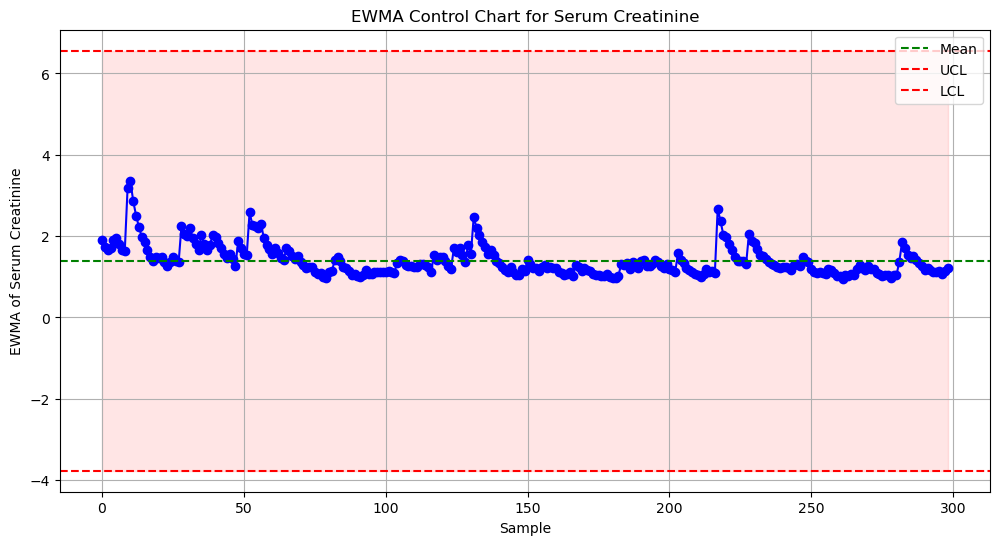

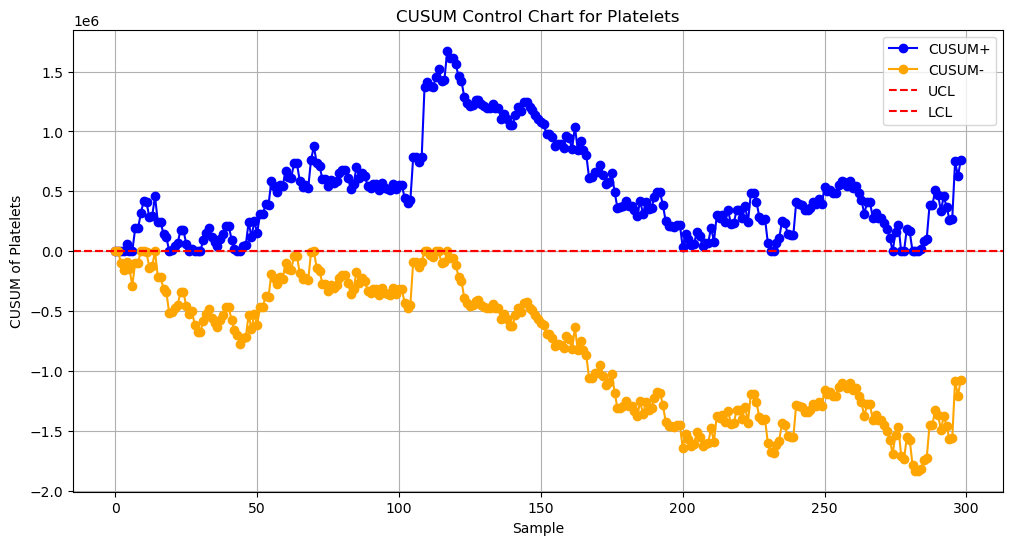

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler

# Load the dataset from a CSV file
file_path = 'datasetES.csv'  # Make sure to replace this with the correct path to your file
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Normalize features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Singular Value Decomposition (SVD)
U, s, Vt = svd(df_scaled, full_matrices=False)
S = np.diag(s)

# Reconstruct the matrix with reduced dimensions (keep top k components)
k = 2  # Number of components to keep
df_reduced = np.dot(U[:, :k], S[:k, :k])



# Quadratic Forms: Compute variance-covariance matrix
cov_matrix = np.cov(df_scaled.T)

# Enhanced visualization of the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=df.columns, yticklabels=df.columns)
plt.title('Covariance Matrix')
plt.show()

# Shewhart Control Chart for 'ejection_fraction'
ejection_fraction = df['ejection_fraction']

# Calculate control limits
mean_ef = np.mean(ejection_fraction)
std_ef = np.std(ejection_fraction)
UCL = mean_ef + 3 * std_ef
LCL = mean_ef - 3 * std_ef

# Enhanced Shewhart Control Chart
plt.figure(figsize=(12, 6))
plt.plot(ejection_fraction, marker='o', linestyle='-', color='blue')
plt.axhline(y=mean_ef, color='green', linestyle='--', label='Mean')
plt.axhline(y=UCL, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='red', linestyle='--', label='LCL')
plt.fill_between(range(len(ejection_fraction)), UCL, LCL, color='red', alpha=0.1)
plt.xlabel('Sample')
plt.ylabel('Ejection Fraction')
plt.title('Shewhart Control Chart for Ejection Fraction')
plt.legend()
plt.grid(True)
plt.show()

# EWMA Control Chart for 'serum_creatinine'
serum_creatinine = df['serum_creatinine']
lambda_ewma = 0.2  # Smoothing factor

ewma = [serum_creatinine[0]]  # Initialize with the first value
for i in range(1, len(serum_creatinine)):
    ewma.append(lambda_ewma * serum_creatinine[i] + (1 - lambda_ewma) * ewma[-1])

# Calculate control limits
mean_sc = np.mean(serum_creatinine)
std_sc = np.std(serum_creatinine)
UCL_ewma = mean_sc + 3 * (std_sc / np.sqrt(lambda_ewma * (2 - lambda_ewma)))
LCL_ewma = mean_sc - 3 * (std_sc / np.sqrt(lambda_ewma * (2 - lambda_ewma)))

# Enhanced EWMA Chart
plt.figure(figsize=(12, 6))
plt.plot(ewma, marker='o', linestyle='-', color='blue')
plt.axhline(y=mean_sc, color='green', linestyle='--', label='Mean')
plt.axhline(y=UCL_ewma, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_ewma, color='red', linestyle='--', label='LCL')
plt.fill_between(range(len(ewma)), UCL_ewma, LCL_ewma, color='red', alpha=0.1)
plt.xlabel('Sample')
plt.ylabel('EWMA of Serum Creatinine')
plt.title('EWMA Control Chart for Serum Creatinine')
plt.legend()
plt.grid(True)
plt.show()

# CUSUM Control Chart for 'platelets'
platelets = df['platelets']
target = np.mean(platelets)
K = 0.5 * std_ef  # Reference value (often set to 0.5 * std)
H = 5 * std_ef  # Control limit

cusum_pos = [0]  # Positive CUSUM
cusum_neg = [0]  # Negative CUSUM

for i in range(1, len(platelets)):
    cusum_pos.append(max(0, cusum_pos[-1] + (platelets[i] - target - K)))
    cusum_neg.append(min(0, cusum_neg[-1] + (platelets[i] - target + K)))

# Enhanced CUSUM Chart
plt.figure(figsize=(12, 6))
plt.plot(cusum_pos, marker='o', linestyle='-', color='blue', label='CUSUM+')
plt.plot(cusum_neg, marker='o', linestyle='-', color='orange', label='CUSUM-')
plt.axhline(y=H, color='red', linestyle='--', label='UCL')
plt.axhline(y=-H, color='red', linestyle='--', label='LCL')
plt.fill_between(range(len(cusum_pos)), H, -H, color='red', alpha=0.1)
plt.xlabel('Sample')
plt.ylabel('CUSUM of Platelets')
plt.title('CUSUM Control Chart for Platelets')
plt.legend()
plt.grid(True)
plt.show()


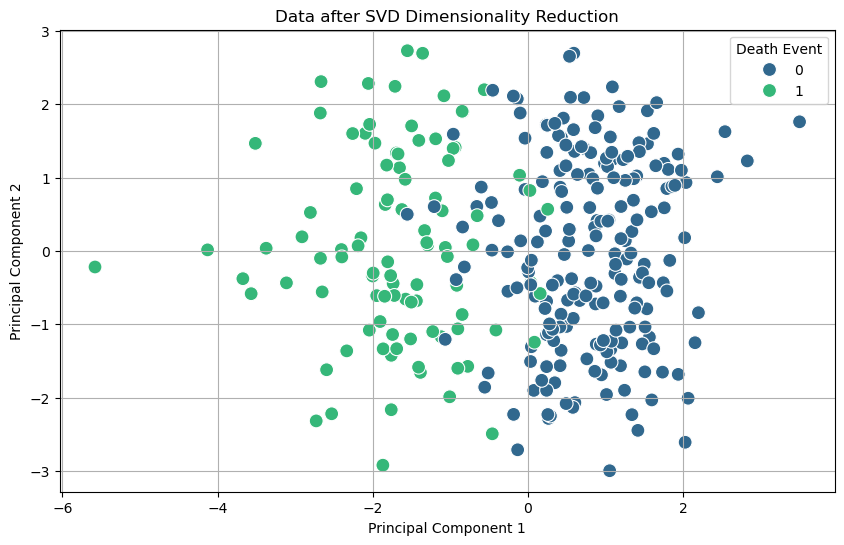

In [9]:
# Enhanced visualization of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_reduced[:, 0], y=df_reduced[:, 1], hue=df['DEATH_EVENT'], palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after SVD Dimensionality Reduction')
plt.grid(True)
plt.legend(title='Death Event')
plt.show()

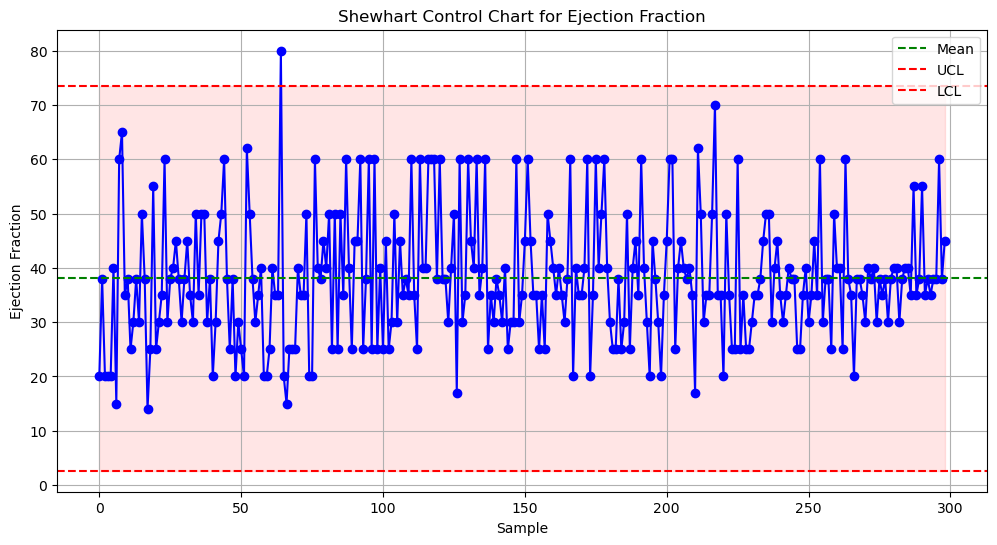

In [11]:
# Enhanced Shewhart Control Chart
plt.figure(figsize=(12, 6))
plt.plot(ejection_fraction, marker='o', linestyle='-', color='blue')
plt.axhline(y=mean_ef, color='green', linestyle='--', label='Mean')
plt.axhline(y=UCL, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='red', linestyle='--', label='LCL')
plt.fill_between(range(len(ejection_fraction)), UCL, LCL, color='red', alpha=0.1)
plt.xlabel('Sample')
plt.ylabel('Ejection Fraction')
plt.title('Shewhart Control Chart for Ejection Fraction')
plt.legend()
plt.grid(True)
plt.show()

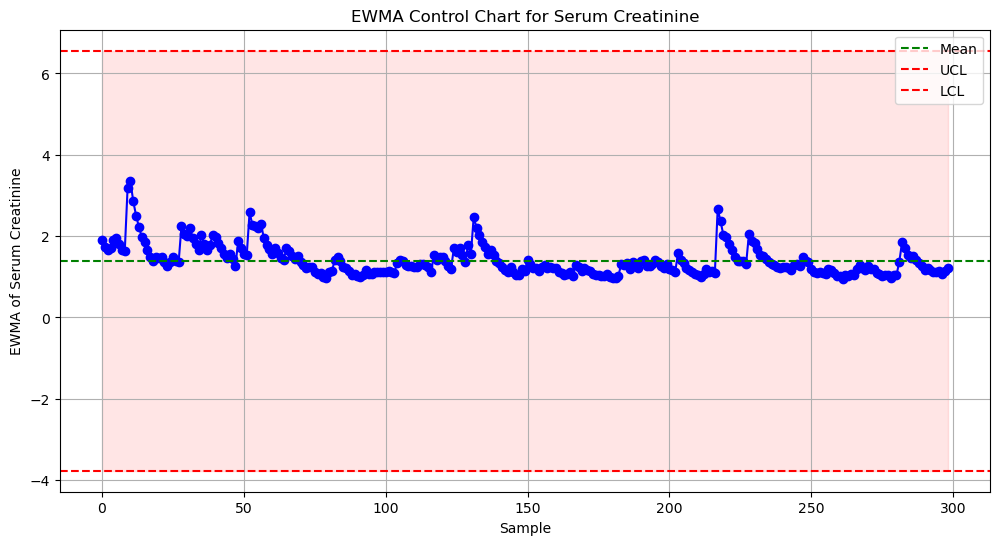

In [13]:
# Enhanced EWMA Chart
plt.figure(figsize=(12, 6))
plt.plot(ewma, marker='o', linestyle='-', color='blue')
plt.axhline(y=mean_sc, color='green', linestyle='--', label='Mean')
plt.axhline(y=UCL_ewma, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_ewma, color='red', linestyle='--', label='LCL')
plt.fill_between(range(len(ewma)), UCL_ewma, LCL_ewma, color='red', alpha=0.1)
plt.xlabel('Sample')
plt.ylabel('EWMA of Serum Creatinine')
plt.title('EWMA Control Chart for Serum Creatinine')
plt.legend()
plt.grid(True)
plt.show()

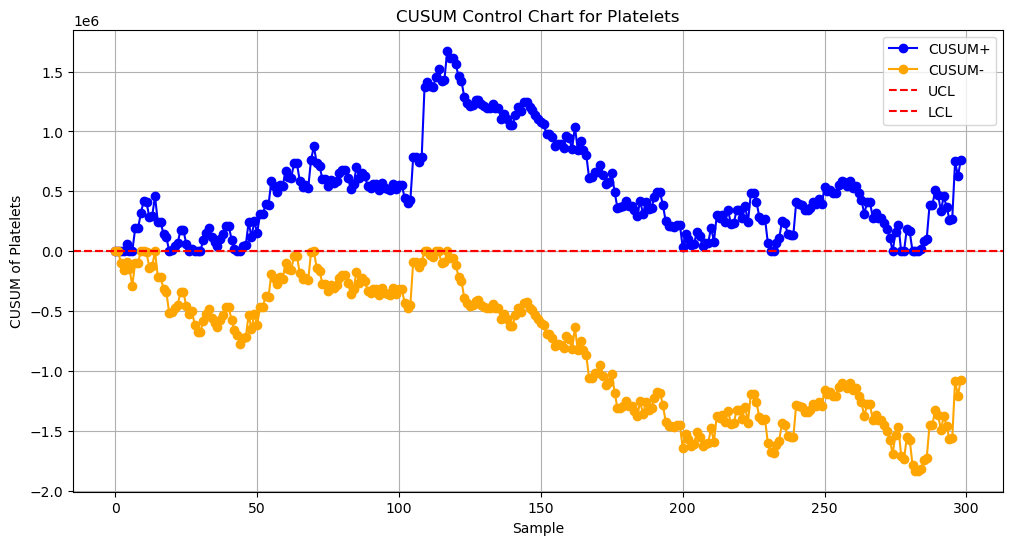

In [15]:
# Enhanced CUSUM Chart
plt.figure(figsize=(12, 6))
plt.plot(cusum_pos, marker='o', linestyle='-', color='blue', label='CUSUM+')
plt.plot(cusum_neg, marker='o', linestyle='-', color='orange', label='CUSUM-')
plt.axhline(y=H, color='red', linestyle='--', label='UCL')
plt.axhline(y=-H, color='red', linestyle='--', label='LCL')
plt.fill_between(range(len(cusum_pos)), H, -H, color='red', alpha=0.1)
plt.xlabel('Sample')
plt.ylabel('CUSUM of Platelets')
plt.title('CUSUM Control Chart for Platelets')
plt.legend()
plt.grid(True)
plt.show()


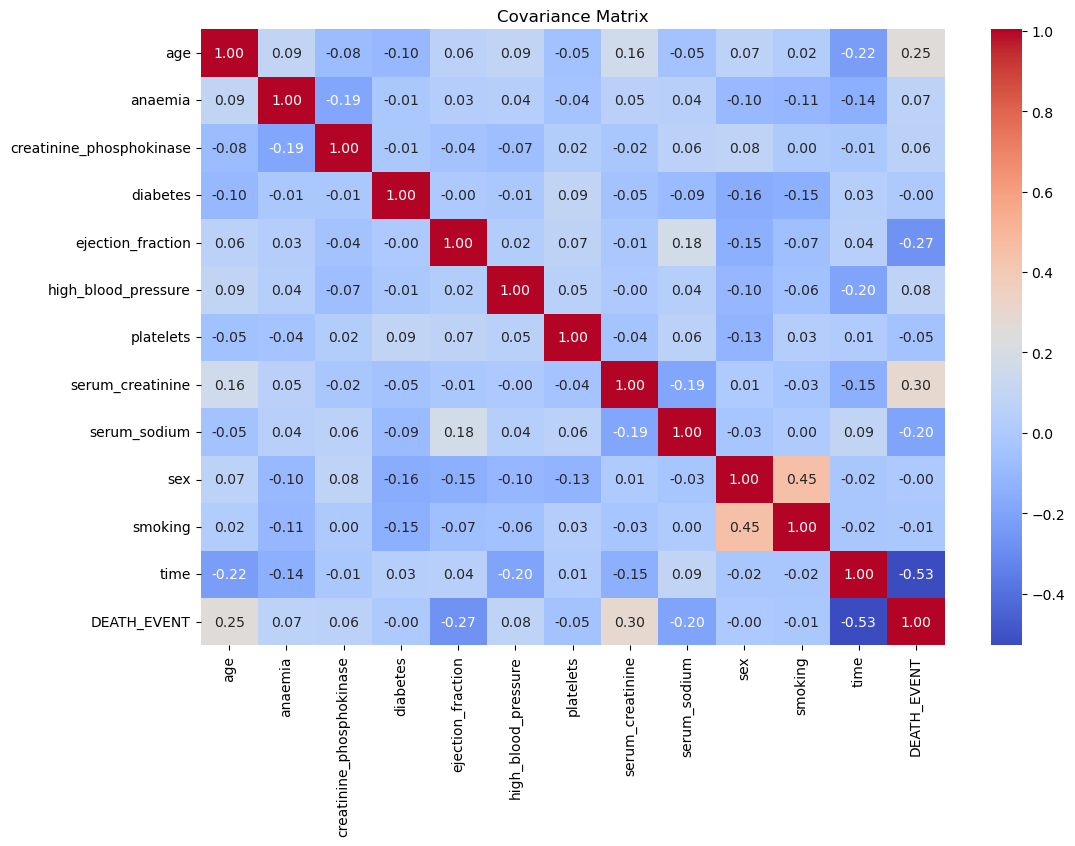

In [17]:
# Enhanced visualization of the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=df.columns, yticklabels=df.columns)
plt.title('Covariance Matrix')
plt.show()